In [2]:
import urllib  
import requests
from bs4 import BeautifulSoup
import json
import os
#urllib、requests都是爬取数据的基本库，只是两者的爬取方式不同
#BeautifulSoup是解析网络文本的工具库

# 输入需要搜索的东西 自动请求网页信息 返回网页源码

输入您需要查找的图片主题
pig
<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-HK">
 <head>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <meta content="origin" name="referrer"/>
  <title>
   pig - Google 搜尋
  </title>
  <script nonce="5M8ejVQ2cat5RssHNfw7WQ==">
   (function(){window.google={kEI:'7CeDXaTgNInAoATz-KeYBQ',kEXPI:'0,1353747,5662,591,139,224,510,18,228,819,3152,377,207,1017,53,1431,577,2,124,10,169,103,441,319,19,539,164,9,1131754,143,1197747,329520,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,1334,3650,314,744,1744,328,5033,10931,279,1191,14056,861,7055,2445,2646,23,770,845,3666,1027,6615,3598,363,3320,5505,2439,1522,1800,512,2111,1119,2,579,727,2431,1362,283,4040,4968,773,2251,4743,7327,1987,1719,1808,1478,7,491,9264,1689,5297,2016,38,920,873,1214,1367,1195,416,2729,7,2655,315,91,2,631,1137,2103,694,448,12,866,12,5,7,6022,2883,21,318,1117,482,420,2128,1,369,2777,520,
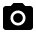
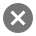
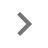
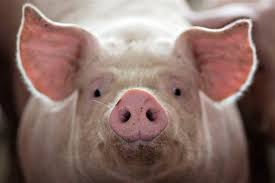
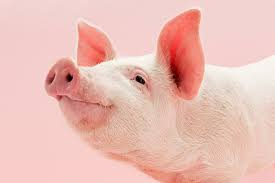
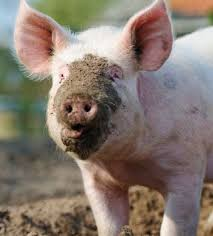
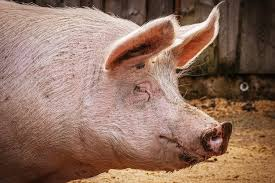
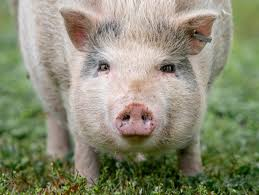
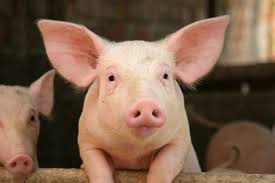
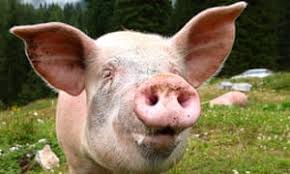
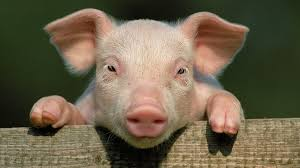

In [6]:
#定义网站的名字 可以自定义任何一个网站 这里用的是谷歌图片
GOOGLE_IMAGE = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'
#获取输入的数据
print('输入您需要查找的图片主题')
data=input()
#将data转换成字典
data={'q':data}
#将输入数据变成网页格式 此函数仅编码两元素元组或字典
search=urllib.parse.urlencode(data)
#拼接得到最终的网址
search=GOOGLE_IMAGE+search

#请求之前先伪装成浏览器，需要定义头部信息
usr_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
    }
#利用头部信息，生成一个请求
Req=urllib.request.Request(search,headers=usr_agent)
#提交请求
response = urllib.request.urlopen(Req)
#获取源代码
html=response.read()

#将源代码按html格式输出
soup = BeautifulSoup(html, 'html.parser') #'html.parser'代表的是采用的解析器
print(soup.prettify())

In [5]:
#查找html源码中div标签中的内容
results=soup.findAll('div',{"class":'rg_meta'})
results

[<div class="rg_meta notranslate">{"cb":9,"cl":3,"cr":15,"id":"DfYREnTVY8oK-M:","isu":"agric.wa.gov.au","itg":0,"ity":"jpg","oh":1357,"ou":"https://www.agric.wa.gov.au/sites/gateway/files/P15_7479%20Pig%20in%20straw%20shelter_1.jpg","ow":2040,"pt":"Keep pigs healthy - follow the biosecurity checklist ...","rh":"agric.wa.gov.au","rid":"p0LhePXzIQOTyM","rmt":0,"rt":0,"ru":"https://www.agric.wa.gov.au/livestock-biosecurity/keep-pigs-healthy-follow-biosecurity-checklist","st":"Department of Agriculture and Food, Western Australia","th":183,"tu":"https://encrypted-tbn0.gstatic.com/images?q\u003dtbn:ANd9GcSFUuRQJCn0HhnPQmaaaY_guaVgiyA7NcwHN3g9MGIY-7pVVau2","tw":275}</div>,
 <div class="rg_meta notranslate">{"cl":3,"cr":3,"id":"Vx4VjrqsUX-oQM:","isu":"nbcnews.com","itg":0,"ity":"jpg","oh":507,"ou":"https://media3.s-nbcnews.com/j/newscms/2018_33/2396836/ss-180412-twip-07_fb2bf30232dbcd77d3cb9780eaf07eb7.fit-760w.jpg","ow":760,"pt":"Lab-grown lungs successfully transplanted into pigs, raising .

In [8]:
results[0]
#将json对象转化成python对象,得到其中的链接信息
link=json.loads(results[0].text)['ou']
#发送链接请求
rs=requests.get(link)
#将链接内容存入新的文件中
with open('img0','w') as f:
    f.write(str(rs.content))

'/Users/xwx/Desktop/learning'

# 从壁纸网站下载该壁纸

In [36]:
##从壁纸网站下载该壁纸
usr_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
    }
WALLPAPERS_KRAFT = 'https://www.58pic.com/'#壁纸网站地址
data=input()
sq={'q':data}
#编码成网页需要的形式
search=urllib.parse.urlencode(sq)
#连接成网页地址
g=WALLPAPERS_KRAFT+str(data)
g
#生成网页请求
#re=urllib.request.Request(g,headers=usr_agent)
#提交请求
#respons=urllib.request.urlopen(re)
#获取源代码
#html=respons.read()
#将源代码解码成html的格式
#soup=BeautifulSoup(html,'html.parser')


pig


'https://www.58pic.com/pig'

# 找出GitHub上星级最高的python项目


In [ ]:
os.getcwd(